# Riddle #1

## An NEO with a peculiar orbit

The recently discovered asteroid 2020 HY5, firstly observed by Mt. Lem­
mon Survey on 23 April 2020, has an interesting particularity: it roughly
passes half of its orbital period of about 387 days inside 1.3 au and the
other half outside. Such distance is used for the definition of NEOs: the
perihelion distance of an NEO must be below 1.3 au. 2020 HY5 actually
spends 192.0 days below 1.3 au and 194.9 days above that distance.

And here is a riddle:

* Assuming an NEO that spends exactly 50% of its time inside 1.3 au and
50% of its time outside 1.3 au, what would be the maximum aphelion
such an NEO could have?
* As a bonus, would you be able to find similar cases in our database?
(Hint: you can use the advanced search functionality in our left menu)

## Solution by Daniel Estévez

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We assume that the NEO orbit is described by a Keplerian elliptical orbit. If we write $r_0 = 1.3\ \mathrm{au}$, the condition that the object spends exactly half of the time inside $r_0$ (and half the time outside $r_0$) can be rewritten by saying that when the object's mean anomaly $M$ equals $M_0 = \pi/2$, then the distance between the object and the Sun $r$ equals $r_0$. Indeed, since the mean anomaly grows uniformly in time, an object satisfying such condition would spend half of the orbital period having mean anomaly $M$ with $|M| < \pi/2$ and inside $r_0$, and half of the orbital period having mean anomaly $M$ with $|M| > \pi/2$ and outside $r_0$ (here we assume the mean anomaly to range between $-\pi$ and $\pi$).

By using Kepler's formula for the eccentric anomaly $E$, we see that when $M = M_0$, the eccentric anomaly $E_0$ is given as the solution of the equation
$$M_0 = E_0 - \varepsilon \sin E_0,$$
where $\varepsilon$ is the eccentricity.

The formula for the heliocentric distance then yields the condition
$$r_0 = a(1 - \varepsilon \cos E_0),$$
where $a$ is the semi-major axis. Now, the aphelion radius for such an orbit is
$$a(1 + \varepsilon) = r_0 \frac{1+\varepsilon}{1 - \varepsilon \cos E_0}.$$

Since $r_0$ is fixed, we want to maximise
$$f(\varepsilon, E_0) = \frac{1+\varepsilon}{1 - \varepsilon \cos E_0}$$
subject to the condition
$$E_0 - \varepsilon \sin E_0 = M_0.$$

I haven't been able to find an analytic formula for the solution to this problem, but the solution can be approximated numerically, as we do below.

First note that $\varepsilon$ can be computed in terms of $E_0$ by
$$\varepsilon = \frac{E_0 - M_0}{\sin E_0},$$
since $M_0 = \pi/2$ is fixed. As long as $\sin E_0 \neq 0$ this formula makes sense, but not all the values for $E_0$ are acceptable, since we need $0 \leq \varepsilon < 1$. Below we plot $\varepsilon$ in terms of $E_0$ for the acceptable range of parameters.

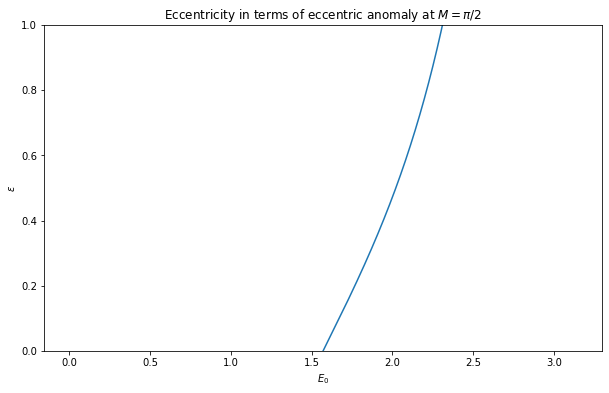

In [2]:
M0 = np.pi/2
E0 = np.linspace(1e-3, np.pi, 10000)
eps = (E0 - M0)/np.sin(E0)

plt.figure(figsize = (10,6), facecolor = 'w')
plt.plot(E0, eps)
plt.xlabel('$E_0$')
plt.ylabel('$\\varepsilon$')
plt.ylim((0,1))
plt.title('Eccentricity in terms of eccentric anomaly at $M = \\pi/2$');

Now that we have $\varepsilon$ in terms of $E_0$, we can compute and plot $f$ in terms of $E_0$. Below we plot $f$ and its maximum.

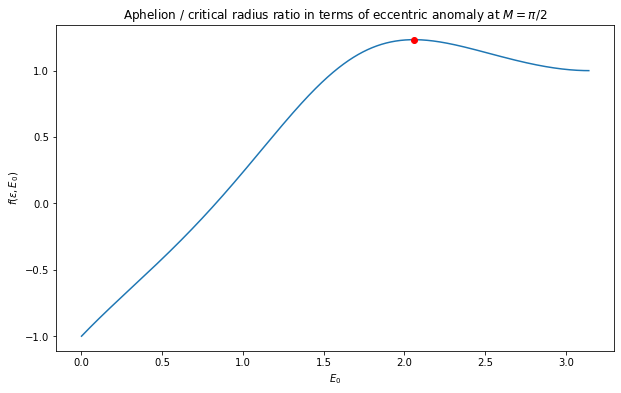

In [3]:
f = (1 + eps)/(1 - eps * np.cos(E0))
plt.figure(figsize = (10,6), facecolor = 'w')
plt.plot(E0, f)

idx = np.argmax(f)
plt.plot(E0[idx], f[idx], 'o', color = 'red')

plt.xlabel('$E_0$')
plt.ylabel('$f(\\varepsilon, E_0)$')
plt.title('Aphelion / critical radius ratio in terms of eccentric anomaly at $M = \\pi/2$');

Below we print out our results. We see that the maximum is attained at an eccentricity of approximately 0.55 (and this is indeed a valid value for $\varepsilon$) and that the aphelion is 1.23 times $r_0$.

In [4]:
print('Configuration where maximum is attained')
print('Eccentricity =', eps[idx])
print('E0 = ', E0[idx])
print('Aphelion / r_0 = ', f[idx])

Configuration where maximum is attained
Eccentricity = 0.5522225779735035
E0 =  2.0586080081674902
Aphelion / r_0 =  1.2330741623724644


The maximum aphelion that an object as described in this riddle can have is shown below.

In [5]:
f[idx] * 1.3

1.6029964110842037

For the bonus part of the question there is some ambiguity about what "similar cases" means. If we understand this as objects that spend approximately half the time inside 1.3au and have an aphelion as large as possible given this condition, then a search in the [database](http://neo.ssa.esa.int/advanced-search) with the criteria that the eccentricity must be between 0.5 and 0.6 and the aphelion between 1.5 and 1.6 shows the following objects. This yields the objects we want, because the property that the object spends half the time inside 1.3au is completely determined by the relation between the eccentricity and the aphelion.

| Designator | 	Eccentricity |	Aphelion (au) |
|------------|---------------|----------------|
|2001XX4 |0.556838 |1.5669|
|2006EK53 |0.517586 |1.5559|
|2007DA |0.573595 |1.5894|
|2007US |0.577134 |1.5121|
|2008LC2 |0.515329 |1.5285|
|2009UM1 |0.59611 |1.5344|
|2011CK22 |0.565387 |1.5757|
|2012VE37 |0.536756 |1.5985|
|2013AH76 |0.546486 |1.5228|
|2016GG216 |0.515344 |1.528|
|2016VU2 |0.547716 |1.5271|
|2017SK21 |0.506605 |1.5429|
|2018CC1 |0.500576 |1.5917|
|2018BB5 |0.592965 |1.5233|
|2019QZ4 |0.560951 |1.5978|
|2019SM2 |0.5503 |1.5186|
|2019EO |0.531979 |1.523|
|2019GD20 |0.536367 |1.5772|
|2019SC8 |0.530063 |1.5955|
|2019YR6 |0.516992 |1.5625|
|2020AD3 |0.594735 |1.5674|
|3753 Cruithne |0.514844 |1.5114|
|88213 2001AF2 |0.595312 |1.5219|
|141531 2002GB |0.528936 |1.5168|
|250577 2005AC |0.517868 |1.5936|
|439437 2013NK4 |0.549901 |1.5856|
|481025 2004VA1 |0.51237 |1.59|
|511684 2015BN509 |0.568469 |1.5787|
|512234 2015VO66 |0.599967 |1.5234|
|512244 2015YE18 |0.540916 |1.5985|
|539856 2017EV2 |0.55758 |1.5735|

If we understand "similar objects" just as objects that spend half the time inside 1.3au, then the search is more complex. We need to pull out from the database the eccentricity and aphelion for all the objects and select those whose eccentricity and aphelion divided by 1.3au lies close to the curve depicted below.

This curve shows the relation between the eccentricity $\varepsilon$ and the quotient between the aphelion and $r_0$ for those objects that spend half the time inside $r_0$.

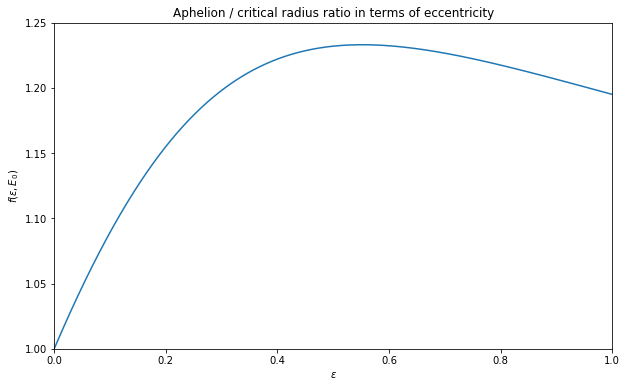

In [6]:
plt.figure(figsize = (10,6), facecolor = 'w')
plt.plot(eps, f)
plt.xlim((0,1))
plt.ylim((1,1.25))
plt.xlabel('$\\varepsilon$')
plt.ylabel('$f(\\varepsilon, E_0)$')
plt.title('Aphelion / critical radius ratio in terms of eccentricity');

By selecting all objects in the database with eccentricity between 0 and 1 and aphelion between 0 and 10000, we can get a CSV file listing the eccentricity and aphelion of all the objects. Here we load this file.

In [7]:
r0 = 1.3
objects = pd.read_csv('export_1591718497855.csv', names = ['Name', 'Eccentricity', 'Aphelion'])
objects

,Name,Eccentricity,Aphelion
0,433 Eros,0.222951,1.7831
1,719 Albert,0.546558,4.0808
2,887 Alinda,0.570332,3.8846
3,1036 Ganymed,0.533046,4.0851
4,1221 Amor,0.435285,2.7550
...,...,...,...
22901,539063 2016MK1,0.715769,2.5753
22902,539694 2016TE93,0.175686,1.2173
22903,539856 2017EV2,0.557580,1.5735
22904,539940 2017HW1,0.458870,3.1183


Now we select only those objects which are close enough to the eccentricity-aphelion curve.

In [8]:
tolerance = 0.01
good_objects = objects[np.abs(np.interp(objects['Eccentricity'], eps, f) - objects['Aphelion']/r0) < tolerance]
good_objects

,Name,Eccentricity,Aphelion
48,1993KA,0.197658,1.5037
235,1999RJ33,0.189328,1.4924
377,2000PN8,0.217068,1.5241
391,2000WN148,0.173545,1.4853
496,2001XP31,0.385333,1.5881
...,...,...,...
22544,506590 2005XB1,0.418766,1.6050
22600,512244 2015YE18,0.540916,1.5985
22664,518507 2006EE1,0.276396,1.5350
22840,528284 2008SW11,0.408322,1.5972


Below we plot the eccentricity and aphelion of those satellites in relation to the curve. We see that most objects have eccentricities around 0.2-0.3, away from the maximum at 0.55.

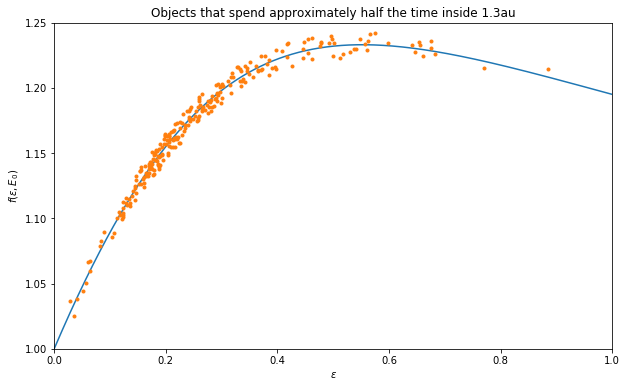

In [9]:
plt.figure(figsize = (10,6), facecolor = 'w')
plt.plot(eps, f)
plt.xlim((0,1))
plt.ylim((1,1.25))
plt.xlabel('$\\varepsilon$')
plt.ylabel('$f(\\varepsilon, E_0)$');
plt.plot(good_objects['Eccentricity'], good_objects['Aphelion']/r0, '.')
plt.title('Objects that spend approximately half the time inside 1.3au');